<a href="https://colab.research.google.com/github/eldercamposds/Forecast_Crypto/blob/main/CRYPTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format


In [ ]:
from prophet import Prophet

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
hj = datetime.today().strftime('%Y-%m-%d')

In [ ]:
print(hj)


2025-04-12


In [ ]:
crypto = "BTC"

In [ ]:
data_ini =  '2018-01-01'
df_eth = yf.download(f'{crypto}-USD', data_ini, hj)


[*********************100%***********************]  1 of 1 completed


In [ ]:
df_eth.tail()


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-04-06,78214.48,83704.72,77097.74,83504.51,36294853736
2025-04-07,79235.34,81119.06,74436.68,78221.34,91262424987
2025-04-08,76271.95,80823.89,76198.02,79218.48,48314590749
2025-04-09,82573.95,83541.00,74589.67,76273.56,84213627038
2025-04-10,79626.14,82700.93,78456.13,82565.98,44718000633


In [ ]:
df_eth.reset_index(inplace=True)


In [ ]:
df_eth


Price,Date,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2018-01-01,13657.20,14112.20,13154.70,14112.20,10291200000
1,2018-01-02,14982.10,15444.60,13163.60,13625.00,16846600192
2,2018-01-03,15201.00,15572.80,14844.50,14978.20,16871900160
3,2018-01-04,15599.20,15739.70,14522.20,15270.70,21783199744
4,2018-01-05,17429.50,17705.20,15202.80,15477.20,23840899072
...,...,...,...,...,...,...
2652,2025-04-06,78214.48,83704.72,77097.74,83504.51,36294853736
2653,2025-04-07,79235.34,81119.06,74436.68,78221.34,91262424987
2654,2025-04-08,76271.95,80823.89,76198.02,79218.48,48314590749


In [ ]:
df_eth.columns = df_eth.columns.droplevel(1)


In [ ]:
df_eth


Price,Date,Close,High,Low,Open,Volume
0,2018-01-01,13657.20,14112.20,13154.70,14112.20,10291200000
1,2018-01-02,14982.10,15444.60,13163.60,13625.00,16846600192
2,2018-01-03,15201.00,15572.80,14844.50,14978.20,16871900160
3,2018-01-04,15599.20,15739.70,14522.20,15270.70,21783199744
4,2018-01-05,17429.50,17705.20,15202.80,15477.20,23840899072
...,...,...,...,...,...,...
2652,2025-04-06,78214.48,83704.72,77097.74,83504.51,36294853736
2653,2025-04-07,79235.34,81119.06,74436.68,78221.34,91262424987
2654,2025-04-08,76271.95,80823.89,76198.02,79218.48,48314590749
2655,2025-04-09,82573.95,83541.00,74589.67,76273.56,84213627038


In [ ]:
df = df_eth[["Date", "Close"]]
df.rename(columns={'Date':'ds','Close':'y'}, inplace=True)

In [ ]:
import matplotlib.pyplot as plt

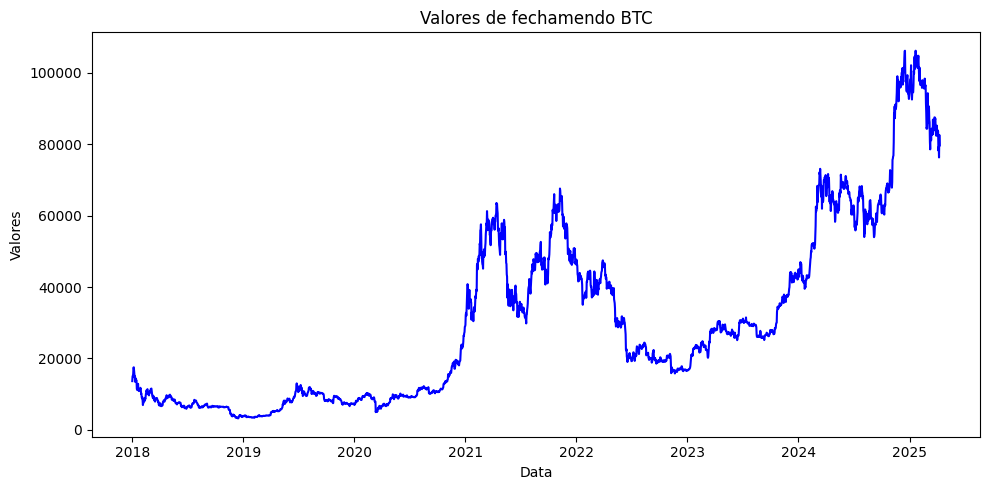

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df["ds"], df["y"], linestyle='-', color='b')
plt.title(f"Valores de fechamendo {crypto}")
plt.xlabel("Data")
plt.ylabel("Valores")
plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdl1j3mip/wirgixf8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdl1j3mip/sy2rxnjj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85339', 'data', 'file=/tmp/tmpdl1j3mip/wirgixf8.json', 'init=/tmp/tmpdl1j3mip/sy2rxnjj.json', 'output', 'file=/tmp/tmpdl1j3mip/prophet_model9az09xj3/prophet_model-20250412031015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:10:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:10:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df_futuro = model.make_future_dataframe(periods=730)

In [ ]:
df_futuro.tail()

,ds
3382,2027-04-06
3383,2027-04-07
3384,2027-04-08
3385,2027-04-09
3386,2027-04-10


In [ ]:
previsao = model.predict(df_futuro)

In [ ]:
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2018-01-01,10277.58,5123.57,17561.18,10277.58,10277.58,0.10,0.10,0.10,0.00,0.00,0.00,0.10,0.10,0.10,0.00,0.00,0.00,11293.93
1,2018-01-02,10261.39,5422.84,17591.54,10261.39,10261.39,0.10,0.10,0.10,-0.00,-0.00,-0.00,0.10,0.10,0.10,0.00,0.00,0.00,11239.79
2,2018-01-03,10245.19,5300.69,17371.37,10245.19,10245.19,0.10,0.10,0.10,0.00,0.00,0.00,0.10,0.10,0.10,0.00,0.00,0.00,11263.52
3,2018-01-04,10229.00,4701.05,17697.28,10229.00,10229.00,0.09,0.09,0.09,-0.00,-0.00,-0.00,0.10,0.10,0.10,0.00,0.00,0.00,11191.03
4,2018-01-05,10212.81,4685.95,17522.12,10212.81,10212.81,0.10,0.10,0.10,0.00,0.00,0.00,0.10,0.10,0.10,0.00,0.00,0.00,11220.96


In [ ]:
plot_plotly(model, previsao)

In [ ]:
plot_components_plotly(model, previsao)